In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
iris_df = pd.read_csv('datasets/iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.6,3.1,1.5,0.2,Iris-setosa
1,6.8,2.8,4.8,1.4,Iris-versicolor
2,4.3,3.0,1.1,0.1,Iris-setosa
3,6.8,3.0,5.5,2.1,Iris-virginica
4,6.3,3.4,5.6,2.4,Iris-virginica


In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df[iris_df.isnull().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


In [7]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.6,3.1,1.5,0.2,0
1,6.8,2.8,4.8,1.4,1
2,4.3,3.0,1.1,0.1,0
3,6.8,3.0,5.5,2.1,2
4,6.3,3.4,5.6,2.4,2


In [10]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Visualizing the data

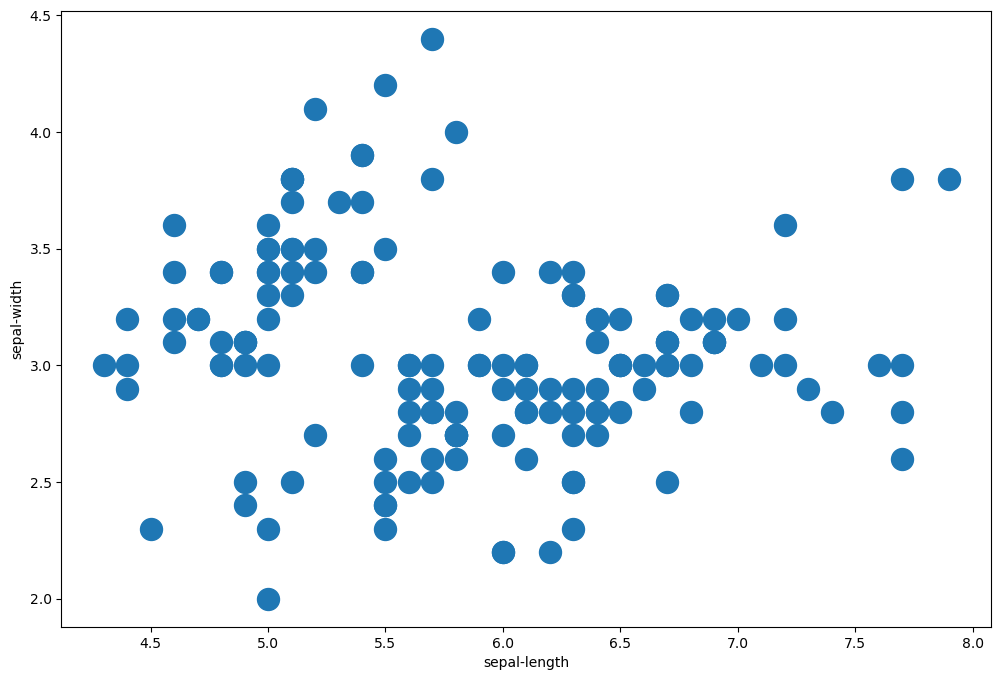

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

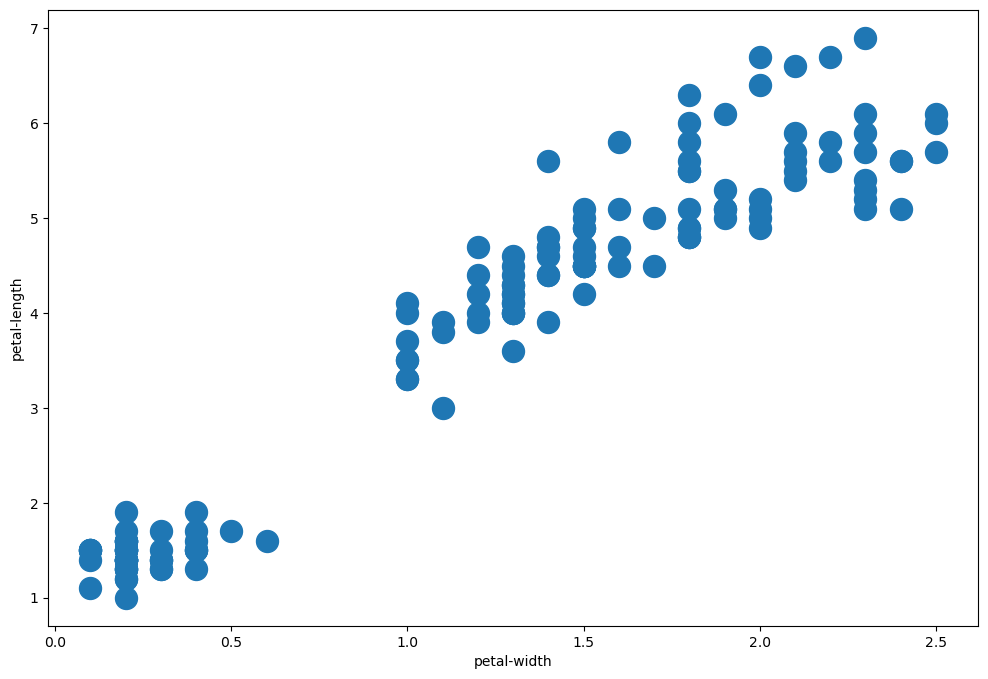

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

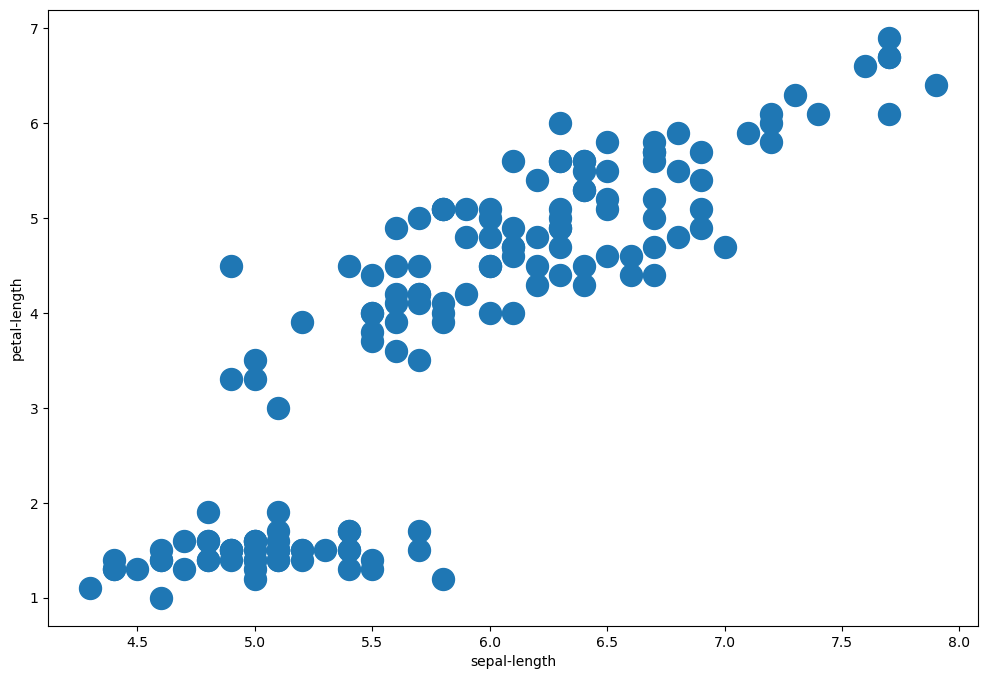

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

In [17]:
iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

,sepal-length,petal-length
99,5.2,1.5
120,5.5,3.7
2,4.3,1.1
133,6.4,5.6
98,6.1,5.6


In [18]:
iris_2D.shape

(150, 2)

In [19]:
iris_2D = np.array(iris_2D)

In [20]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

In [21]:
kmeans_model_2D.labels_

array([1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1], dtype=int32)

In [22]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

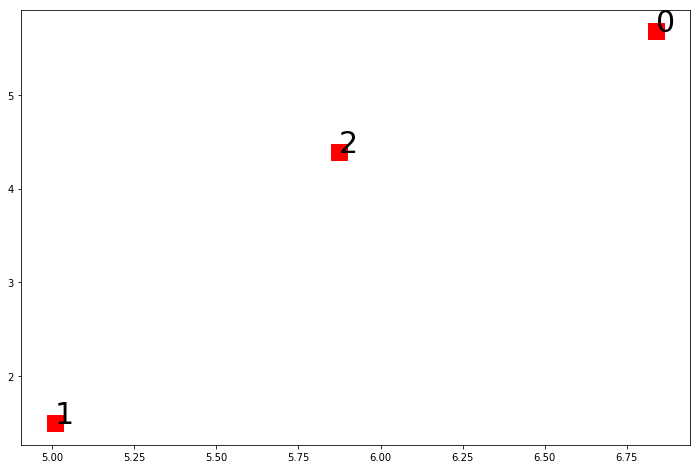

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [23]:
iris_labels = iris_df['class']

In [24]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))

print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409132
Silhouette_score:  0.5890612474062568


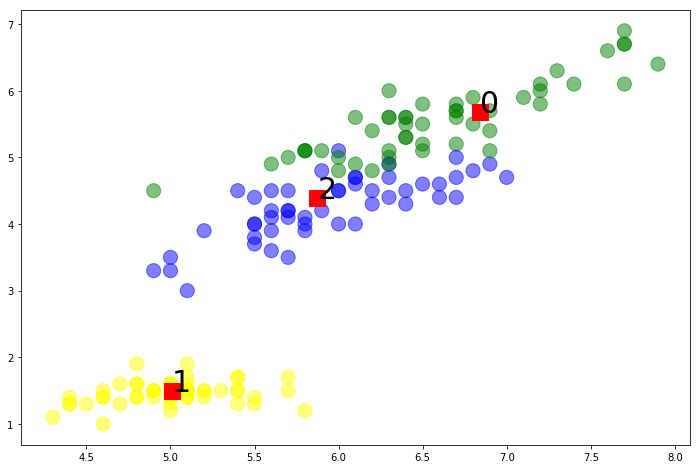

In [23]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [27]:
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,4.6,3.1,1.5,0.2
1,6.8,2.8,4.8,1.4
2,4.3,3.0,1.1,0.1
3,6.8,3.0,5.5,2.1
4,6.3,3.4,5.6,2.4


In [29]:
iris_labels = iris_df['class']

iris_labels.sample(5)

82     0
133    2
146    1
95     0
81     0
Name: class, dtype: int64

In [30]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [32]:
kmeans_model.labels_

array([0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0], dtype=int32)

In [33]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [34]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800484
Silhouette_score:  0.5525919445499754
